<a href="https://colab.research.google.com/github/eirikngard/Eika/blob/master/Eika_vs_FNO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eikas versjon av Finans Norges klimarapport 2020
https://www.finansnorge.no/siteassets/statistikk/artikkel/2020/lansering-klimarapport/finans-norges-klimarapport-2020.pdf

## Hovedoversikt over værerlaterte vannskader og skader i naturskadepoolen

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
from google.colab import files
uploaded = files.upload()

Saving fno_værrelatert_vannskade_2010-2019.csv to fno_værrelatert_vannskade_2010-2019.csv


### Leser total skadekost værrealterte vannskader fra 2010-2019
(Tilstopp, frost og vann utenfra)

In [101]:
kol = ['årsak','år','skade']
vær = pd.read_csv('fno_værrelatert_vannskade_2010-2019.csv',sep=',',skiprows=1,names=kol)

In [105]:
ård = np.arange(2010,2020,1) #2010-2019
testr = []
for i in ård:
  test = vær.loc[vær['år']==i,'skade'].sum()
  testr.append(test*(10**(-6)))
testr
sum_vær=round(np.sum(testr),1)

pool = np.array([6.2,59.9,49.4,26.2,33.3,49.4,19.3,21.8,15.7,17.1]) #skader fra Eeirik fra 2010-2019
sum_pool=np.sum(pool)

In [115]:
#Plot-sizes 
labelsize=15
titelsize=20

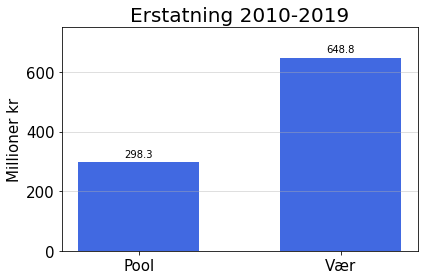

In [116]:
labels = ['Pool','Vær']
data = [sum_pool,sum_vær]


x = np.arange(len(labels))  # the label locations
width = .60  # the width of the bars

fig, ax = plt.subplots()
bar1 = ax.bar(x, data, width, color='royalblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Millioner kr', size=labelsize)
ax.set_title('Erstatning 2010-2019',size=titelsize)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0,750)
ax.grid(axis='y',alpha=0.5)
ax.tick_params(axis = 'both', which = 'major', labelsize = labelsize)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(bar1)
fig.tight_layout()
plt.show()

### Kakediagram total skadekost vaæærealterte vannskader og ppolskader

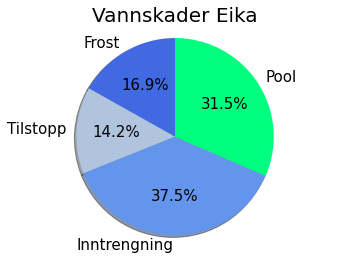

In [132]:
frost = (vær.loc[vær['årsak']=='Frost','skade'].sum())*10**(-6)
tilstopp = (vær.loc[vær['årsak']=='Tilstopping','skade'].sum())*10**(-6)
inntre = (vær.loc[vær['årsak']=='Vann utenfra','skade'].sum())*10**(-6)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:\n",
labels = 'Frost', 'Tilstopp', 'Inntrengning', 'Pool'#, 'Nat.skade ikke pool'\n",
sizes = [frost,tilstopp,inntre,sum_pool]#,snitt4]\n",
explode = (0, 0, 0, 0)  # only \"explode\" the 2nd slice (i.e. 'Hogs')\n",
colors = ['royalblue','lightsteelblue','cornflowerblue','springgreen']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,labels=labels,colors=colors, autopct='%1.1f%%', shadow=True, 
        startangle=90,textprops={'fontsize': labelsize})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.\n",
ax1.set_title('Vannskader Eika',size=20)
plt.show()

#her er poolen rød fordi det ikke er skilt på hvilke skadeårsaker innad i poolen.
#tallene som er bruk for pool er bare totale skadetall per år (2010-2019)

### Stacked barplot med fylkesvis oversikt for både værrelaterte- og naturskader. 

In [177]:
uploaded = files.upload()

Saving fno_værrelatert_vannskade_2010-2019_fylke_frost.csv to fno_værrelatert_vannskade_2010-2019_fylke_frost.csv
Saving fno_værrelatert_vannskade_2010-2019_fylke_inntrengning.csv to fno_værrelatert_vannskade_2010-2019_fylke_inntrengning.csv
Saving fno_værrelatert_vannskade_2010-2019_fylke_tilstopp.csv to fno_værrelatert_vannskade_2010-2019_fylke_tilstopp.csv


In [195]:
frost = pd.read_csv('fno_værrelatert_vannskade_2010-2019_fylke_frost.csv',header=None,skiprows=1,names=kol)
intre = pd.read_csv('fno_værrelatert_vannskade_2010-2019_fylke_inntrengning.csv',header=None,skiprows=1,names=kol)
tilstopp = pd.read_csv('fno_værrelatert_vannskade_2010-2019_fylke_tilstopp.csv',header=None,skiprows=1,names=kol)

In [220]:
dfrost = []; dinn = []; dtil = []; 
fylker = ['Østfold','Akershus','Oslo','Hedmark', 'Oppland','Buskerud', 'Vestfold',
          'Telemark', 'Aust-Agder','Vest-Agder','Rogaland','Hordaland',
          'Sogn og Fjordane','Møre og Romsdal', 'Trøndelag', 'Nordland',
            'Troms fylke', 'Finnmark Finnmárku']
for i in fylker:
  dfrost += [(frost.loc[frost['fylke']==i,'skade'].sum())*10**(-6)]
  dtil += [(tilstopp.loc[tilstopp['fylke']==i,'skade'].sum())*10**(-6)]
  dinn += [(intre.loc[intre['fylke']==i,'skade'].sum())*10**(-6)]

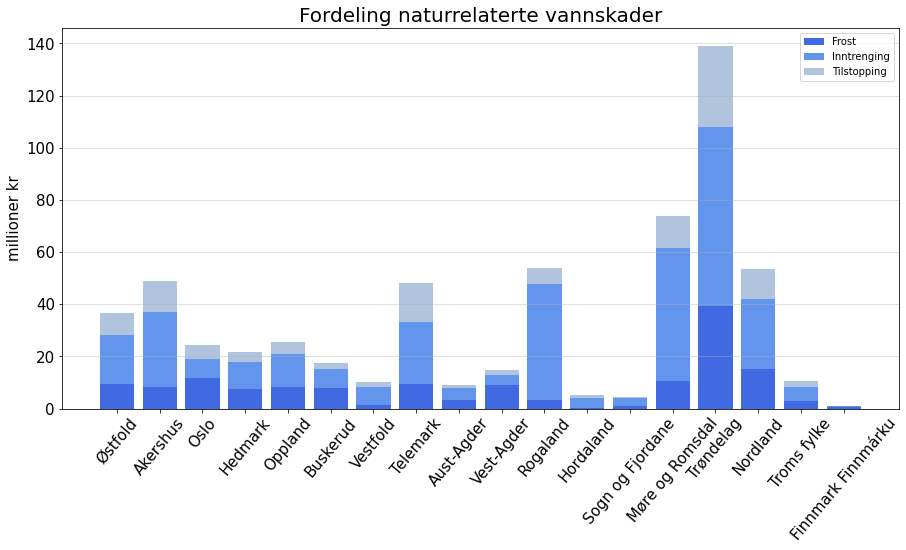

In [222]:
fig, ax = plt.subplots(figsize=(15, 7))

bar=ax.bar(fylker, np.array(dfrost),color='royalblue', label='Frost')
bar=ax.bar(fylker, np.array(dinn),bottom=np.array(dfrost),color='cornflowerblue', label='Inntrenging')
bar=ax.bar(fylker, np.array(dtil), bottom=np.array(dinn)+np.array(dfrost),color='lightsteelblue', label='Tilstopping')

ax.tick_params(axis='x',rotation=50,labelsize=labelsize)
ax.tick_params(axis='y',labelsize=15)
ax.set_ylabel('millioner kr',size=15)
ax.set_title('Fordeling naturrelaterte vannskader',size=titelsize)
ax.grid(axis='y',alpha=0.5)
ax.legend();
plt.show()